# Water quality
 Набор данных о качестве воды в городской среде. В зависимости от ее состава нужно определить безопасна ли она для употребления человека.
 
 Признаки: 
 ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium'] 
 
 Данные признаки показывают уровень содержания данного вещества в воде на литр (мг/л)

 Класс объекта 'is_safe': 0 - небезопасно, 1 - безопасно

 Число объектов: 7999
 
 Число признаков: 20
 
 Количество классов: 2
 
 Имеются пропущенные значения "#NUM!"
 
 Классы не сбалансированы: 89% на 11%
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [227]:
data = pd.read_csv('waterQuality1.csv', sep = ',', engine = 'python')
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Dtype 'object' указывает на местоположение пропущенных значений

In [229]:
data['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

# Обработка пропущенных значений

In [230]:
data['is_safe']=data['is_safe'].map({'0':0,'1':1,'#NUM!':0})

amm=[]
for i in range(len(data)):
    s=data.loc[i,'ammonia']
    if s=='#NUM!':
        amm+=[0]
    else:
        amm+=[float(s)]
data['ammonia']=amm

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# Подготовка данных
Из приведенных данных видно, что все, кроме одного, признаки являются количественными. Класс объекта является категориальным признаком (бинарным).

In [231]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'int64']
print(numerical_columns)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']


# Нормализация количественных признаков

In [232]:
data_binary = data['is_safe']
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data = pd.concat((data_numerical, data_binary), axis = 1)
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.777651,-0.584678,-0.480799,1.054432,-0.993251,-0.711652,2.153315,-0.972944,-1.657351,-0.363187,...,-0.781300,1.129905,-0.348839,0.608788,1.203660,1.661403,1.053706,1.339029,-0.917081,1
1,1.307235,0.775442,-0.599568,1.432693,-1.131949,1.208857,1.599074,-0.223180,0.295000,1.002578,...,0.009460,-1.409196,1.046787,-0.739318,0.893271,0.124602,1.053706,0.851397,0.197998,1
2,0.271780,-0.028470,-0.480799,-0.812204,-0.965511,0.803719,1.044833,-1.202464,0.501719,-0.818443,...,-0.368729,0.783418,-0.383730,0.271762,1.912071,1.786241,0.706121,2.035645,-1.288774,0
3,0.548429,-0.331344,-0.480799,1.144886,-1.159689,1.968491,-0.802637,1.306950,0.708439,1.184681,...,-1.434537,-1.517473,-0.069714,-0.402292,-0.415000,-0.516807,-1.031806,2.105306,0.197998,1
4,0.200642,1.132361,-0.520389,-1.124681,-1.020990,0.192117,1.636024,-0.360892,-0.371096,-0.575640,...,0.301698,-0.555611,-0.383730,-0.739318,0.024859,-0.219779,-1.031806,-0.611496,-0.917081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,-0.487026,-0.731048,-0.639158,0.314356,-0.077840,-0.809041,-0.802637,-1.187162,1.374535,-0.970194,...,1.676933,0.806878,-0.575628,-0.065265,-0.728781,-0.340312,1.401292,-0.611496,-0.545388,1
7995,-0.487026,1.119976,-0.559978,-0.803981,-0.910032,-0.672697,-0.839586,-1.202464,1.627192,-0.970194,...,-1.176680,0.081420,-0.575628,-1.413371,-0.846944,-0.779398,1.401292,-0.332850,1.313077,1
7996,-0.455409,-0.835760,-0.639158,-0.787535,-0.355237,-0.828519,-0.728738,-1.202464,0.317969,-0.970194,...,1.419076,1.101031,-0.575628,-1.750398,-0.854294,0.826279,-1.726977,-0.750820,0.197998,1
7997,-0.518643,-0.481093,-0.599568,0.355471,-1.187429,-0.068885,-0.913485,-1.095355,-1.772195,-0.970194,...,-1.709584,-1.771925,-2.320161,-1.750398,-0.930619,-1.257226,-1.726977,-1.029466,-1.660467,1


In [233]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,...,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000
mean,-4.485023e-14,-4.780621e-15,1.066419e-13,2.481867e-15,1.960515e-14,8.832207e-15,8.488054e-14,-2.329633e-14,1.887407e-15,-8.479833e-16,...,1.429061e-14,-4.066839e-15,-9.094155e-15,-3.336521e-14,-9.331203e-17,-8.303883e-15,4.898778e-14,1.340738e-13,3.300469e-14,0.114014
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.317848
min,-5.265469e-01,-1.616027e+00,-6.391579e-01,-1.289142e+00,-1.187429e+00,-8.479967e-01,-9.134848e-01,-1.233066e+00,-1.772195e+00,-9.701944e-01,...,-1.709584e+00,-1.771925e+00,-2.320161e+00,-1.750398e+00,-9.306189e-01,-1.257226e+00,-1.726977e+00,-1.029466e+00,-1.660467e+00,0.000000
25%,-4.949300e-01,-8.684115e-01,-5.203886e-01,-8.286506e-01,-9.655111e-01,-8.090412e-01,-7.287378e-01,-1.095355e+00,-8.419574e-01,-9.701944e-01,...,-8.844426e-01,-8.696145e-01,-5.756282e-01,-7.393181e-01,-8.079333e-01,-9.042358e-01,-1.031806e+00,-7.508196e-01,-9.170813e-01,0.000000
50%,-4.712173e-01,-1.608461e-02,-4.412090e-01,-3.105974e-01,-7.784042e-02,-6.415322e-01,-5.809402e-01,-8.546847e-02,-3.595071e-03,-3.024867e-01,...,4.384110e-02,2.006335e-02,1.570755e-01,-6.526493e-02,-4.930211e-01,-2.197786e-01,1.095031e-02,-4.721732e-01,1.979978e-01,0.000000
75%,-3.052284e-01,8.846571e-01,-2.432601e-01,7.501783e-01,7.543508e-01,8.037192e-01,7.122887e-01,8.938150e-01,8.921893e-01,8.811771e-01,...,8.861726e-01,8.646257e-01,7.502167e-01,9.458148e-01,7.360972e-01,7.530977e-01,7.061211e-01,6.424126e-01,9.413838e-01,0.000000
max,3.465090e+00,1.752747e+00,3.517769e+00,2.773053e+00,2.418733e+00,2.533346e+00,2.411961e+00,1.827195e+00,1.673130e+00,2.064841e+00,...,1.728504e+00,1.806638e+00,2.791320e+00,1.619868e+00,2.462177e+00,2.182279e+00,1.748877e+00,2.453614e+00,1.684770e+00,1.000000


# Обучающая и тестовая выборка

In [234]:
dataX = data.drop('is_safe', axis=1)
dataY = data['is_safe']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Size train: ',N_train)
print('Size test: ', N_test)

Size train:  6399
Size test:  1600


# Обучение классификатора

In [235]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (1,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42,
                          max_iter=1000)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("1 слой")
print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовом датасете: ", np.mean(y_test  != y_test_pred))

1 слой
Ошибка на обучающем датасете:  0.08141897171433037
Ошибка на тестовом датасете:  0.084375


In [236]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (2,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42,
                          max_iter=1000)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("2 слоя")
print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовом датасете: ", np.mean(y_test  != y_test_pred))

2 слоя
Ошибка на обучающем датасете:  0.04625722769182685
Ошибка на тестовом датасете:  0.0575


Продолжим работать с 2 слоями
# Зависимость ошибки от параметра alpha

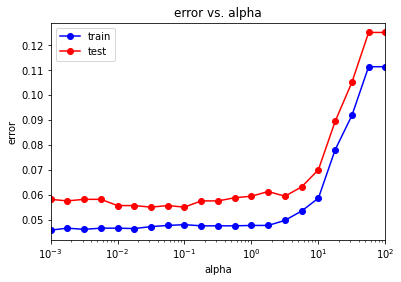

In [237]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (2,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

# Оптимальное значение alpha:

In [238]:
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print("alpha_opt = ", alpha_opt)

alpha_opt =  0.03162277660168379


# Классификатор при оптимальном значении alpha

In [239]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2,),
                          solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовом датасете: ", np.mean(y_test != y_test_pred))

Ошибка на обучающем датасете:  0.04719487419909361
Ошибка на тестовом датасете:  0.055


# Зависимость ошибки от количества нейронов

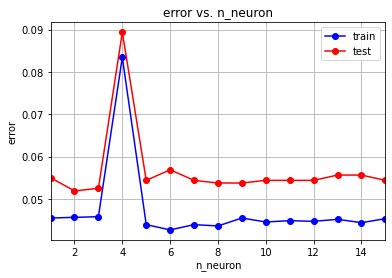

In [240]:
max_neuron = 15
n_neuron = np.arange(1, max_neuron + 1, 1)
test_err = []
train_err = []

for i in n_neuron:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2, i), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.plot(n_neuron, train_err, 'b-o', label = 'train')
plt.plot(n_neuron, test_err, 'r-o', label = 'test')
plt.xlim([np.min(n_neuron), np.max(n_neuron)])
plt.grid(True)
plt.title('error vs. n_neuron')
plt.xlabel('n_neuron')
plt.ylabel('error')
plt.legend()
plt.show()

# Оптимальное количество нейронов

In [241]:
min_test_err = np.min(test_err)
n_neuron_opt = n_neuron[test_err == min_test_err]
n_neuron_opt = n_neuron_opt[0]
print("n_neuron_opt = ", n_neuron_opt)

n_neuron_opt =  2


# Классификатор при оптимальном значении числа нейронов

In [242]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2, n_neuron_opt),
                          solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовом датасете: ", np.mean(y_test != y_test_pred))

Ошибка на обучающем датасете:  0.04563213002031567
Ошибка на тестовом датасете:  0.051875


# Зависимость ошибки от количества слоев

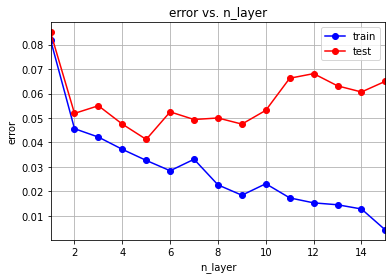

In [243]:
max_layer = 15
n_layer = np.arange(1, max_layer + 1, 1)
test_err = []
train_err = []

for i in n_layer:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (i, n_neuron_opt), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=2000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.plot(n_layer, train_err, 'b-o', label = 'train')
plt.plot(n_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(n_layer), np.max(n_layer)])
plt.grid(True)
plt.title('error vs. n_layer')
plt.xlabel('n_layer')
plt.ylabel('error')
plt.legend()
plt.show()

# Оптимальное количество слоев

In [244]:
min_test_err = np.min(test_err)
n_layer_opt = n_neuron[test_err == min_test_err]
n_layer_opt = n_layer_opt[0]
print("n_layer_opt = ", n_layer_opt)

n_layer_opt =  5


Оптимальное число слоев = 5. Если их продолжить увеличивать, то начинается переобучение. Недообучение наблюдается только при наличии 1 слоя
# Классификатор при оптимальном значении числа нейронов

In [245]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (n_layer_opt, n_neuron_opt),
                          solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающем датасете: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовом датасете: ", np.mean(y_test != y_test_pred))

Ошибка на обучающем датасете:  0.03266135333645882
Ошибка на тестовом датасете:  0.04125


Оптимальное число слоев = 5. Если их продолжить увеличивать, то начинается переобучение. Недообучение наблюдается только при наличии 1 слоя

# Итог
Найденные оптимальные параметры:
1. alpha_opt = 0.03162277660168379
2. n_neuron_opt = 2
3. n_layer_opt = 5
